In [1]:
import numpy
from scipy import stats
import matplotlib.pyplot as pyplot
import math

$\chi^2_{k = 1} = \text{Norm}^2(0, 1)$

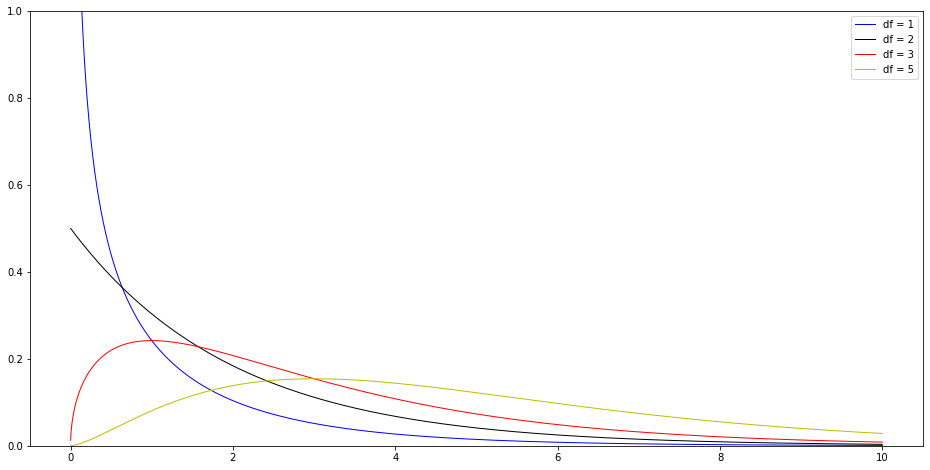

In [2]:

x_axis = numpy.arange(start=0.001, stop=10, step=0.001)

pyplot.figure(figsize=(16, 8))

pyplot.plot(x_axis, stats.chi2.pdf(x=x_axis, df=1), 'b-', linewidth=1.0, label='df = 1')
pyplot.plot(x_axis, stats.chi2.pdf(x=x_axis, df=2), 'k-', linewidth=1.0, label='df = 2')
pyplot.plot(x_axis, stats.chi2.pdf(x=x_axis, df=3), 'r-', linewidth=1.0, label='df = 3')
pyplot.plot(x_axis, stats.chi2.pdf(x=x_axis, df=5), 'y-', linewidth=1.0, label='df = 5')

pyplot.gca().set_ylim(bottom=0, top=1)

pyplot.legend(loc='best', frameon=True)
pyplot.show()


<br><br><br><br><br>

![title](tulio.jpg)

$$
H_0: P_1 = P_2 = P_3 = P_4 = P_5 = P_6 = \frac{1}{6}
$$

$$
H_1: H_0\text{ неверна}
$$

|$i$|1|2|3|4|5|6|
|---|---|---|---|---|---|---|
|$n_i$|5|8|9|8|10|20|

$$
\tau = n \sum_{i=1}^{k}\frac{\left(\frac{n_i}{n} - P_i\right)^2}{P_i}
$$

$$
H_0: \tau \sim \chi^2_{k-1}
$$

In [3]:
frequencies = [5, 8, 9, 8, 10, 20]

tau = sum(frequencies) * sum([(f / sum(frequencies) - 1/6) ** 2 / (1/6) for f in frequencies])

tau

13.4

In [5]:
1 - stats.chi2.cdf(x=tau, df=6 - 1)

0.019905220334774376

<br><br><br><br><br>

In [5]:
stats.chisquare(f_obs=[5, 8, 9, 8, 10, 20], f_exp=[10, 10, 10, 10, 10, 10])

Power_divergenceResult(statistic=13.4, pvalue=0.01990522033477438)

In [6]:
stats.chisquare(f_obs=[5, 8, 9, 8, 10, 20])

Power_divergenceResult(statistic=13.4, pvalue=0.01990522033477438)

Если корзин много (например, проверяем goodness of fit для непрерывного распределения), нужно сгруппировать выборку по корзинам вручную.

В общем случае:
    
$
\tau \sim \chi^2_{k-1-p}
$

$~$

$~$

$~$

$~$

$~$

||1|2|3|4|5|6|
|---|---|---|---|---|---|---|
|die1|5|8|9|8|10|20|
|die2|5|3|3|6|4|9|
|die3|4|4|5|6|4|6|

$$
\tau = n \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{\left(\frac{n_{ij}}{n} - P_{[i\cdot]}P_{[\cdot j]} \right)^2}{P_{[i\cdot]}P_{[\cdot j]}}
$$

$$
\tau \sim \chi^2_{(r-1)(c-1)}
$$

In [7]:
stats.chi2_contingency(observed=[[5, 8, 9, 8, 10, 20], [5, 3, 3, 6, 4, 9]])

(2.5900694133452755,
 0.7628735182793918,
 5,
 array([[ 6.66666667,  7.33333333,  8.        ,  9.33333333,  9.33333333,
         19.33333333],
        [ 3.33333333,  3.66666667,  4.        ,  4.66666667,  4.66666667,
          9.66666667]]))

||F|M|
|---|---|---|
|product|6|4|
|dev|7|52|

In [7]:
stats.chi2_contingency(observed=[[6, 4], [7, 52]], correction=True)

(10.000156570124792,
 0.0015652691733868517,
 1,
 array([[ 1.88405797,  8.11594203],
        [11.11594203, 47.88405797]]))

In [11]:
stats.chisquare(f_obs=[7, 52], f_exp=[5, 5])

Power_divergenceResult(statistic=442.6, pvalue=2.941641598946577e-98)

||F|M|
|---|---|---|
|product|6|4|
|dev|7|52|
|analyst|10|8|

In [10]:
stats.chi2_contingency(observed=[[6, 4], [7, 52], [10, 8]])

(20.08255342667649,
 4.3564118642907576e-05,
 2,
 array([[ 2.64367816,  7.35632184],
        [15.59770115, 43.40229885],
        [ 4.75862069, 13.24137931]]))

## Проблемы

Цитируя Википедию...

The approximation to the chi-squared distribution breaks down if expected frequencies are too low. It will normally be acceptable so long as no more than 20% of the events have expected frequencies below 5. Where there is only 1 degree of freedom, the approximation is not reliable if expected frequencies are below 10.